In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\fraud_data.csv")

In [6]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21688,-3.959670,3.297819,-1.079436,-2.290106,-1.405133,2.452586,-4.649235,-12.365464,0.409493,1.251992,...,12.617463,-2.969195,1.755050,0.433324,-0.010827,-0.126613,0.200111,-0.160542,29.95,0
21689,-1.066503,0.539240,0.735343,-0.506800,0.843980,-1.047877,1.141302,-0.127448,-0.119221,-1.870265,...,-0.162535,-0.576352,-0.184969,-0.136154,0.760012,0.048105,-0.017475,0.092365,85.66,0
21690,-2.175162,-0.441681,1.883137,-0.267440,1.056972,0.136404,0.113595,-0.055983,0.765616,-0.087568,...,-0.201561,0.397761,-0.855500,-0.627900,0.590977,0.515065,0.433089,-0.150291,131.10,0
21691,0.031406,0.694817,0.083233,-0.797912,0.564318,-0.560787,0.805901,0.051453,-0.053817,-0.200190,...,-0.255891,-0.664635,0.018844,-0.539177,-0.504019,0.155133,0.232846,0.079420,4.49,0


In [7]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.duplicated().any()

True

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape

(21550, 30)

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
d=DummyClassifier(strategy='most_frequent')

In [14]:
from sklearn.metrics import accuracy_score,recall_score

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X=df.drop(columns='Class')
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [18]:
X_train.shape

(17240, 29)

In [19]:
y_train.shape

(17240,)

In [21]:
X_test.shape

(4310, 29)

In [22]:
y_test.shape

(4310,)

In [23]:
d.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [24]:
y_pred=d.predict(X_test)

In [25]:
d_score=(accuracy_score(y_test,y_pred),recall_score(y_test,y_pred))

In [26]:
d_score

(0.9830626450116009, 0.0)

<Axes: >

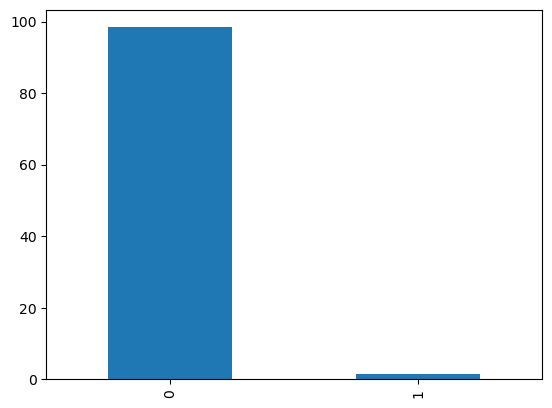

In [31]:
(df['Class'].value_counts()/len(df)*100).plot(kind='bar')

In [32]:
from sklearn.svm import SVC

In [33]:
s=SVC()

In [34]:
s.fit(X_train,y_train)

SVC()

In [36]:
from sklearn.metrics import precision_score

In [37]:
y_pred2=s.predict(X_test)

In [38]:
s_acc=accuracy_score(y_test,y_pred2)
s_prec=precision_score(y_test,y_pred2)
s_rec=recall_score(y_test,y_pred2)

In [40]:
s_acc

0.9890951276102088

In [41]:
s_prec

1.0

In [42]:
s_rec

0.3561643835616438

In [43]:
S=SVC(C=1000000000,gamma=0.0000001)

In [44]:
S.fit(X_train,y_train)

SVC(C=1000000000, gamma=1e-07)

In [45]:
y_pred3=S.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
probs=S.decision_function(X_test)

In [49]:
len(probs)

4310

In [50]:
len(probs>-220)

4310

In [52]:
y_pred4=(probs>-220).astype(int)

In [59]:
pred_arr=y_pred3==y_pred4

In [60]:
pred_arr=list(pred_arr)

In [62]:
pred_arr

[True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [63]:
from collections import Counter

In [64]:
Counter(pred_arr)

Counter({True: 4293, False: 17})

In [65]:
confusion_matrix(y_test,y_pred3)

array([[4234,    3],
       [  18,   55]], dtype=int64)

In [66]:
confusion_matrix(y_test,y_pred4)

array([[4222,   15],
       [  13,   60]], dtype=int64)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
l=LogisticRegression()

In [70]:
l.fit(X_train,y_train)

G:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
from sklearn.metrics import precision_recall_curve,roc_curve

In [74]:
probs=l.predict_proba(X_test)

In [75]:
probs

array([[0.9982365 , 0.0017635 ],
       [0.99423364, 0.00576636],
       [0.99738316, 0.00261684],
       ...,
       [0.99652177, 0.00347823],
       [0.97031199, 0.02968801],
       [0.99746672, 0.00253328]])

In [79]:
precision,recall,th=precision_recall_curve(y_test,probs[:,1])

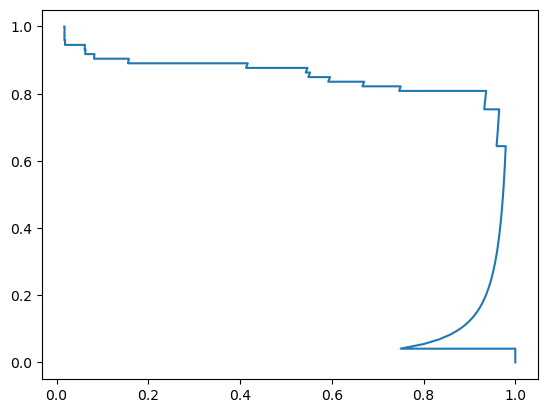

In [82]:
plt.plot(precision,recall)

In [83]:
th

array([1.21789887e-11, 2.80107872e-10, 8.17878128e-09, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [84]:
precision[np.abs(recall-0.75).argmin()]

0.9322033898305084

In [85]:
fpr,tpr,threshold=roc_curve(y_test,probs[:,1])

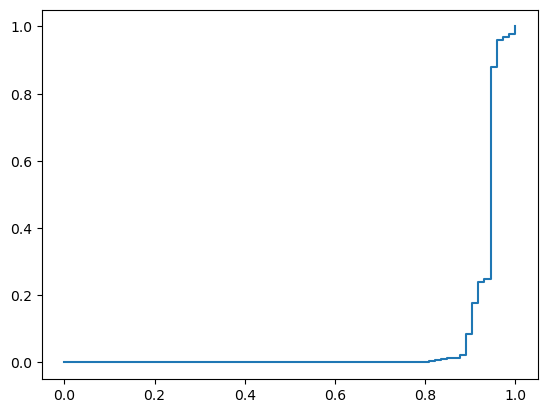

In [86]:
plt.plot(tpr,fpr)

In [87]:
tpr[np.abs(fpr-0.16).argmin()]

0.9041095890410958

In [89]:
from sklearn.model_selection import GridSearchCV

In [96]:
lr=LogisticRegression(solver='liblinear')
params={'penalty':['l1','l2'],'C':[0.01,0.1,1,10]}
g=GridSearchCV(lr,param_grid=params,cv=3,n_jobs=-1,scoring='recall',return_train_score=True)

In [97]:
g.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='recall')

In [98]:
g.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [99]:
g.best_score_

0.8021978021978023

In [94]:
g.cv_results_

{'mean_fit_time': array([0.08873884, 0.34390608, 0.14557258, 0.53662125, 0.51283439,
        0.65613707, 0.58362635, 0.50617361]),
 'std_fit_time': array([0.00730745, 0.03828116, 0.00770698, 0.01949001, 0.04968901,
        0.01949211, 0.0464298 , 0.077545  ]),
 'mean_score_time': array([0.01562826, 0.01562603, 0.01725976, 0.01041977, 0.01815724,
        0.0052073 , 0.00520778, 0.        ]),
 'std_score_time': array([0.01276019, 0.01275659, 0.00171271, 0.00736789, 0.00357473,
        0.00736423, 0.00736491, 0.        ]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'penalty': 'l1'},
  {'C': 0.01, 'penal

In [101]:
result=pd.DataFrame({'l1':[0.99396755,0.99622969,0.9961717,0.99622972],'l2':[0.99564968,0.99651974,0.99628773,0.99628773]},index=[0.01,0.1,1,10])

In [102]:
result

,l1,l2
0.01,0.993968,0.995650
0.10,0.996230,0.996520
1.00,0.996172,0.996288
10.00,0.996230,0.996288


In [105]:
np.array(result).shape

(4, 2)

In [108]:
p=df['Class'].value_counts()/df.shape[0]*100

In [109]:
type(p)

pandas.core.series.Series

In [110]:
p

0    98.394432
1     1.605568
Name: Class, dtype: float64

In [111]:
p[1]

1.6055684454756378

In [112]:
df['Class'].value_counts()/df.shape[0]

0    0.983944
1    0.016056
Name: Class, dtype: float64

In [113]:
type(g.cv_results_)

dict

In [115]:
g.cv_results_['mean_test_score']

array([0.63003663, 0.75824176, 0.79120879, 0.8021978 , 0.79120879,
       0.79487179, 0.79487179, 0.7985348 ])

In [116]:
g.cv_results_['mean_test_score'].reshape(4,2)

array([[0.63003663, 0.75824176],
       [0.79120879, 0.8021978 ],
       [0.79120879, 0.79487179],
       [0.79487179, 0.7985348 ]])